In [1]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import tifffile as tiff
import sys
import os
sys.path.append(os.path.abspath("../.."))
from src.preprocessing.preprocessing_functions import *

# Getting data ready
#### Note: everything is repeated for the 3 Bioreplicates (BR1, BR2, BR3)

In [2]:
# Load all track data
track_data_br1 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR1_tracks_0606224.csv') 
track_data_br2 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR2_tracks_0606224.csv') 
track_data_br3 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR3_tracks_060624.csv') 

filtered_track_br1, y_train_br1 = process_track_data(track_data_br1)
filtered_track_br2, y_train_br2 = process_track_data(track_data_br2)
filtered_track_br3, y_train_br3 = process_track_data(track_data_br3)

Filtered data shape (478, 1080, 10) (478,)
Filtered data shape (493, 1080, 10) (493,)
Filtered data shape (856, 1080, 10) (856,)


In [ ]:
track_data_br1

,source_spot,target_spot,edge_time,xpos,ypos,tpos,ROI_nb,cell_av_FRET,CFP_av,YFP_av,...,Aspect_Ratio,cell_av_FRET_norm,unique_track_id,trackmate_track_id,iscorrect,fate,fov,apoptosis_time,mitosis_time,daughter
0,3904,3886,120.0,331.519419,156.803264,1,18.0,1.087025,572.693942,622.532588,...,1.186924,0.969704,1,1,1,0,pos1,0,0,0
1,3886,3940,360.0,331.561797,156.890504,2,18.0,1.074442,562.197820,604.049131,...,1.197641,0.958480,1,1,1,0,pos1,0,0,0
2,3940,3922,600.0,331.565249,156.971191,3,18.0,1.094746,566.264879,619.916087,...,1.165354,0.976592,1,1,1,0,pos1,0,0,0
3,3922,3976,840.0,331.314471,156.948877,4,17.0,1.059987,554.551096,587.817219,...,1.192570,0.945585,1,1,1,0,pos1,0,0,0
4,3976,3958,1080.0,331.491845,156.926445,5,17.0,1.075695,567.638741,610.606317,...,1.181459,0.959597,1,1,1,0,pos1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426857,111903,112104,1075.5,156.299896,30.242062,1076,39.0,1.099592,1724.329371,1896.058914,...,1.981744,0.980915,478,101,1,0,pos9,0,0,1
426858,112104,112003,1076.5,156.339442,30.446637,1077,38.0,1.096606,1747.553133,1916.378105,...,1.944212,0.978252,478,101,1,0,pos9,0,0,1
426859,112003,112204,1077.5,156.744160,30.400301,1078,37.0,1.088105,1703.174520,1853.232691,...,1.977091,0.970668,478,101,1,0,pos9,0,0,1
426860,112204,112304,1078.5,156.875455,30.579805,1079,39.0,1.065811,1718.891135,1832.013207,...,1.952941,0.950780,478,101,1,0,pos9,0,0,1


In [4]:
mitosis_tpos = track_data_br1.loc[track_data_br1['daughter'] == 1, 'tpos']
first_mitosis_tpos = mitosis_tpos.iloc[0]
first_mitosis_tpos_per_cell = track_data_br1[track_data_br1['daughter'] == 1].groupby('unique_track_id')['tpos'].first()
# print("First mitosis tpos per cell ID:\n", first_mitosis_tpos_per_cell)
first_mitosis_tpos_per_cell[first_mitosis_tpos_per_cell != 1]

unique_track_id
296    325
470    443
477      4
478    283
Name: tpos, dtype: int64

In [5]:
sub_size = (20, 20)

# BR1
images_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=False, FRET=False)
segmentations_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=False)
fret_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=True)

# BR2
images_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=False, FRET=False)
segmentations_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=False)
fret_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=True)

# BR3
images_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=False, FRET=False)
segmentations_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=False)
fret_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=True)

print("BR1 Images shape:", images_br1.shape, "BR2:", images_br2.shape, "BR3:", images_br3.shape)
print("BR1 tracks shape:", filtered_track_br1.shape, "BR2:", filtered_track_br2.shape, "BR3:", filtered_track_br3.shape)

[ 1  1  1 ... 20 20 20]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G001_0001.tif']
[21 21 21 ... 39 39 39]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G002_0001.tif']
[40 40 40 ... 59 59 59]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G003_0001.tif']
[ 60  60  60 ... 122 122 122]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G004_0001.tif']
[123 123 123 ... 161 161 161]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G005_0001.tif']
[162 162 162 ... 203 203 203]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G006_0001.tif']
[204 204 204 ... 296 296 296]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B05_G007_0001.tif']
[297 297 297 ... 375 375 375]
bioreplicate: B

# Processing
#### From this point on, cells on the raw images, segmentation, fret and tracks will be processed equally (Outlier remover).

In [7]:
#### Removing cells in edges of the FOV ####

indexes_to_remove_br1 = edge_indexes(images_br1)

images_br1_no_edges = np.delete(images_br1, indexes_to_remove_br1, axis=0)
y_train_br1_no_edges = np.delete(y_train_br1_, indexes_to_remove_br1)
segmentations_br1_no_edges = np.delete(segmentations_br1, indexes_to_remove_br1, axis=0)
filtered_track_br1_no_edges = np.delete(filtered_track_br1, indexes_to_remove_br1, axis=0)

print("New dataset shape:", images_br1_no_edges.shape, "Segmentations shape:", segmentations_br1_no_edges.shape, "tracks:", filtered_track_br1_no_edges.shape, "y train:", y_train_br1_no_edges.shape)

indexes_to_remove_br2 = edge_indexes(images_br2)

images_br2_no_edges = np.delete(images_br2, indexes_to_remove_br2, axis=0)
y_train_br2_no_edges = np.delete(y_train_br2_, indexes_to_remove_br2)
segmentations_br2_no_edges = np.delete(segmentations_br2, indexes_to_remove_br2, axis=0)
filtered_track_br2_no_edges = np.delete(filtered_track_br2, indexes_to_remove_br2, axis=0)

print("New dataset shape:", images_br2_no_edges.shape, "Segmentations shape:", segmentations_br2_no_edges.shape, "tracks:", filtered_track_br2_no_edges.shape, "y train:", y_train_br2_no_edges.shape)

indexes_to_remove_br3 = edge_indexes(images_br3)

images_br3_no_edges = np.delete(images_br3, indexes_to_remove_br3, axis=0)
y_train_br3_no_edges = np.delete(y_train_br3_, indexes_to_remove_br3)
segmentations_br3_no_edges = np.delete(segmentations_br3, indexes_to_remove_br3, axis=0)
filtered_track_br3_no_edges = np.delete(filtered_track_br3, indexes_to_remove_br3, axis=0)

print("New dataset shape:", images_br3_no_edges.shape, "Segmentations shape:", segmentations_br3_no_edges.shape, "tracks:", filtered_track_br3_no_edges.shape, "y train:", y_train_br3_no_edges.shape)

New dataset shape: (452, 1080, 3, 20, 20) Segmentations shape: (452, 1080, 20, 20) tracks: (452, 1080, 10) y train: (452,)
New dataset shape: (473, 1080, 3, 20, 20) Segmentations shape: (473, 1080, 20, 20) tracks: (473, 1080, 10) y train: (473,)
New dataset shape: (804, 1080, 4, 20, 20) Segmentations shape: (804, 1080, 20, 20) tracks: (804, 1080, 10) y train: (804,)


In [ ]:
#### Overimposing with segmentations to remove background noise ####

# overimposed_br1 = overimpose(images_br1_no_edges, segmentations_br1_no_edges)
# overimposed_br2 = overimpose(images_br2_no_edges, segmentations_br2_no_edges)
# overimposed_br3 = overimpose(images_br3_no_edges, segmentations_br3_no_edges)

: 

In [8]:
##### Removing daughter cells ####
# We can remove the daughter cells by removing the data points that do not have the time points 1,2 or 3 (which means they started their "lifetimes" somewhere in the middle of the time series, meaning they could only be daughter cells)

indexes_daughter_br1 = daughter_indexes(filtered_track_br1_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br1)
br1_mother_tracks = np.delete(filtered_track_br1_no_edges, indexes_daughter_br1, axis=0)
#br1_mother_images = np.delete(overimposed_br1, indexes_daughter_br1, axis=0)
br1_y_train = np.delete(y_train_br1_no_edges, indexes_daughter_br1, axis=0)

indexes_daughter_br2 = daughter_indexes(filtered_track_br2_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br2)
br2_mother_tracks = np.delete(filtered_track_br2_no_edges, indexes_daughter_br2, axis=0)
#br2_mother_images = np.delete(overimposed_br2, indexes_daughter_br2, axis=0)
br2_y_train = np.delete(y_train_br2_no_edges, indexes_daughter_br2, axis=0)

indexes_daughter_br3 = daughter_indexes(filtered_track_br3_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br3)
br3_mother_tracks = np.delete(filtered_track_br3_no_edges, indexes_daughter_br3, axis=0)
#br3_mother_images = np.delete(overimposed_br3, indexes_daughter_br3, axis=0)
br3_y_train = np.delete(y_train_br3_no_edges, indexes_daughter_br3, axis=0)

#print(br1_mother_images.shape, br2_mother_images.shape, br3_mother_images.shape)

Indices of cells without time points 1, 2, and 3 in `tpos`: [10, 15, 18, 36, 78, 81, 85, 96, 99, 105, 110, 111, 139, 148, 152, 153, 156, 157, 170, 179, 182, 185, 186, 187, 190, 191, 195, 198, 203, 220, 222, 228, 232, 241, 245, 247, 270, 285, 292, 302, 304, 306, 326, 329, 359, 371, 378, 391, 398, 406, 409, 412, 418, 436, 443, 445, 446]
Indices of cells without time points 1, 2, and 3 in `tpos`: [3, 5, 11, 28, 30, 33, 36, 46, 65, 72, 74, 76, 80, 82, 83, 88, 89, 92, 94, 105, 108, 109, 110, 119, 135, 140, 152, 156, 162, 182, 189, 194, 209, 232, 233, 263, 265, 273, 274, 275, 281, 283, 299, 304, 305, 307, 318, 325, 329, 333, 342, 369, 374, 395, 397, 402, 427, 429, 432, 439, 443, 458, 465]
Indices of cells without time points 1, 2, and 3 in `tpos`: [40, 63, 71, 77, 107, 116, 118, 155, 158, 162, 172, 174, 178, 180, 183, 188, 191, 195, 199, 204, 206, 212, 214, 225, 237, 239, 243, 246, 256, 262, 266, 277, 279, 287, 290, 307, 308, 309, 336, 346, 361, 368, 387, 389, 403, 409, 425, 426, 438, 456, 4

In [ ]:
### Find the indexes with fates 2 and 3 (proliferation) - check at what time these are different than zero

br3_mother_tracks[br3_y_train==2][:,:,-1][0][1000:1069]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [52]:
br3_mother_tracks[br3_y_train==2][:,-20,-1]

array([0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 0.,
       2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
      dtype=float32)

In [81]:
import numpy as np

# Assuming br3_mother_tracks and br3_y_train are already defined
fate_matrix = br3_mother_tracks[br3_mother_tracks[:,0,-1] == 3][:, :, -1]

# Find the first zero in each row
first_zero_indices = np.apply_along_axis(lambda row: np.argmax(row == 0) if np.any(row == 0) else -1, axis=1, arr=fate_matrix)

# Print the results
print("First zero indices for each row:")
print(first_zero_indices)


First zero indices for each row:
[ 532  464  322  189  379  577  554  601  969  426  546  840 1003  257
  878  518  713  467  579  606  522 1038 1070  180 1027  730  201  548
  344  606]


In [91]:
br1_mother_tracks[br1_y_train == 2].shape

(34, 1080, 10)

In [113]:
import numpy as np

def daugther_trace_removal(matrix):
    """
    For each cell (row) in the matrix, sets all values in all columns to zero 
    starting from the first zero in the 4th column (index 3).
    
    Args:
        matrix (numpy.ndarray): A 3D matrix of shape (cells, time, features).
        
    Returns:
        numpy.ndarray: Processed matrix with zeroed values from the first zero onward in the 4th column.
    """
    processed_matrix = matrix.copy()
    
    for cell_idx, cell in enumerate(processed_matrix):
        # Find the first zero in the 4th column
        first_zero_index = np.argmax(cell[:, 4] == 0) if np.any(cell[:, 4] == 0) else None
        
        # If a zero is found, set all values from that time point onward to zero
        if first_zero_index is not None:
            processed_matrix[cell_idx, first_zero_index:, :] = 0
    
    return processed_matrix

# Apply the function to the subset of the tracks
processed_br1_mother_tracks = daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])

# Confirm the changes
print("Processed matrix shape:", processed_br1_mother_tracks.shape)


Processed matrix shape: (34, 1080, 10)


In [95]:
br1_mother_tracks[br1_y_train == 2][0,:,4][400:600]

array([1.0736096 , 1.055149  , 1.0905303 , 1.092127  , 1.0840935 ,
       1.0563608 , 1.0748883 , 1.0784637 , 1.0592111 , 1.046493  ,
       1.0360446 , 1.0512099 , 1.0363867 , 1.0667735 , 1.0261283 ,
       1.0341673 , 1.0197878 , 1.0158173 , 1.0193248 , 1.0104283 ,
       1.0097171 , 1.024575  , 1.0256407 , 1.0282562 , 1.0327061 ,
       1.0610956 , 1.0475533 , 1.0657954 , 1.0290425 , 1.0522226 ,
       1.0696201 , 1.0079278 , 1.0109152 , 1.0460668 , 1.0738034 ,
       1.038976  , 1.0237169 , 1.0068738 , 1.0322778 , 1.0143622 ,
       1.0208637 , 1.0555756 , 1.0425649 , 0.99591243, 1.0021855 ,
       1.0171853 , 1.0021807 , 1.0263573 , 0.9973811 , 0.9966945 ,
       1.0046283 , 1.0317597 , 1.0341554 , 1.0858612 , 1.072814  ,
       1.1046714 , 1.0886966 , 1.064392  , 1.0410048 , 1.0520434 ,
       1.0210351 , 0.98632115, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [121]:
daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])[10]

array([[206.       , 191.62418  , 169.35526  , ...,   1.2271907,
        988.       ,   2.       ],
       [206.       , 192.09357  , 168.99722  , ...,   1.1654947,
        988.       ,   2.       ],
       [206.       , 191.67625  , 169.0062   , ...,   1.1755966,
        988.       ,   2.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)

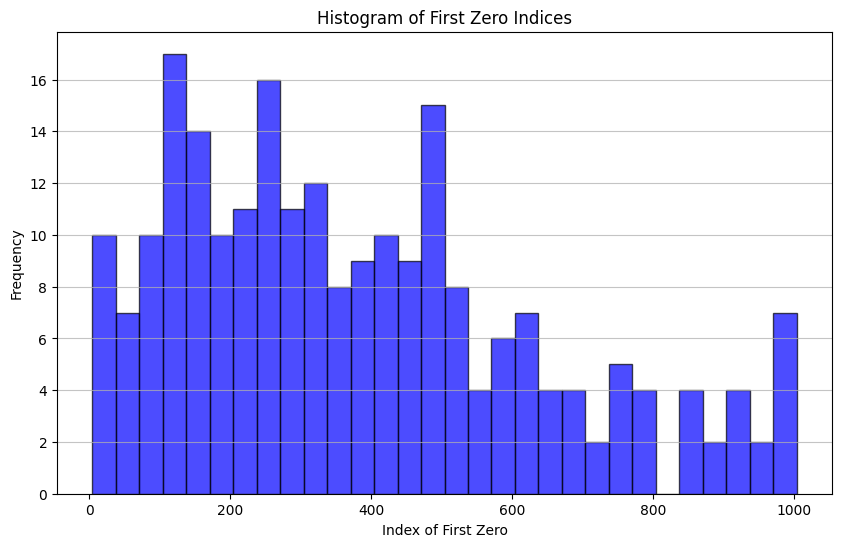

In [128]:
# Extract the matrices
matrix_br1_2 = daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])[:, :, -1]
matrix_br1_3 = daugther_trace_removal(br1_mother_tracks[br1_y_train == 3])[:, :, -1]
matrix_br2_2 = daugther_trace_removal(br2_mother_tracks[br2_y_train == 2])[:, :, -1]
matrix_br2_3 = daugther_trace_removal(br2_mother_tracks[br2_y_train == 3])[:, :, -1]
matrix_br3_2 = daugther_trace_removal(br3_mother_tracks[br3_y_train == 2])[:, :, -1]
matrix_br3_3 = daugther_trace_removal(br3_mother_tracks[br3_y_train == 3])[:, :, -1]

# Function to find the first zero indices in each row
def find_first_zero_indices(matrix):
    return np.apply_along_axis(lambda row: np.argmax(row == 0) if np.any(row == 0) else -1, axis=1, arr=matrix)

# Find first zero indices for both matrices
first_zero_indices_br1_2 = find_first_zero_indices(matrix_br1_2)
first_zero_indices_br1_3 = find_first_zero_indices(matrix_br1_3)
first_zero_indices_br2_2 = find_first_zero_indices(matrix_br2_2)
first_zero_indices_br2_3 = find_first_zero_indices(matrix_br2_3)
first_zero_indices_br3_2 = find_first_zero_indices(matrix_br3_2)
first_zero_indices_br3_3 = find_first_zero_indices(matrix_br3_3)

# Combine the indices from both groups
combined_first_zero_indices = np.concatenate([first_zero_indices_br1_2, first_zero_indices_br1_3, first_zero_indices_br2_2, first_zero_indices_br2_3, first_zero_indices_br3_2, first_zero_indices_br3_3])

# Filter out the values where fret is always NaN (TODO: CHECK LATER WHICH ONES THEY ARE)
filtered_indices = combined_first_zero_indices[combined_first_zero_indices != 0]

# Filter out -1 values (rows with no zeros)
valid_indices = filtered_indices[filtered_indices != -1]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(valid_indices, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of First Zero Indices')
plt.xlabel('Index of First Zero')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
combined_first_zero_indices[np.any(combined_first_zero_indices[:, 0] != 0, axis=1)]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [126]:
combined_first_zero_indices

array([ 462,  190,  635,  288,    0,  500,  312,  160,  225,    0,  912,
        380,  404,  371,    0,  616,  473,  719,    0,  157,  196,   29,
        473,  267,  223,  179,    0,    0,  419,  581,  485,  215,  152,
        245,  499,  186,  862,  390,  142,  146,  267,  375,    0,  176,
         89,    0,  840,  586,  306,  307,   68,  252,    0,  865,  134,
          0,    0,   73,  145,    0,  314,  127,  204,  208,  103,    0,
        250,  416,  497,  566,  685,  785,  112,    0,  688,   16,  219,
        593,  257,   11,   42,  973,  321,  307,  787,  522,  363,  254,
         34,   37,  326,  131,  579,  263,  391,  166,    0,  272,  762,
        951,  248,  511,  760,  312,  350,  380,  694,   84,  471,  292,
        555,  296,  935,  206,   71,    0,  352,  137,  975,  347,  240,
        297,    0,   23,    0,  425,  253,  224,  604,  637,  466,  445,
        485,  138,  461,  140,  306,   71,  581,  473,  650,  113,  519,
         44,  979,  312,  426,  562,  396,  906, 10

In [80]:
br3_mother_tracks[br3_mother_tracks[:,0,-1] == 2][-21]

array([[1.6460000e+03, 1.8505713e+02, 2.2397194e+02, ..., 1.2351209e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.8481119e+02, 2.2382285e+02, ..., 1.2118138e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.8491660e+02, 2.2385893e+02, ..., 1.1923810e+00,
        8.3900000e+02, 2.0000000e+00],
       ...,
       [1.6460000e+03, 1.7720670e+02, 2.3622452e+02, ..., 1.5645307e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.7727531e+02, 2.3627551e+02, ..., 1.5824816e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.7739049e+02, 2.3631149e+02, ..., 1.5859095e+00,
        8.3900000e+02, 2.0000000e+00]], dtype=float32)

In [ ]:
np.nonzero(br3_mother_tracks[br3_y_train==2][:,:,-1])

(array([ 0,  0,  0, ..., 83, 83, 83]),
 array([   0,    1,    2, ..., 1064, 1065, 1066]))